<a href="https://colab.research.google.com/github/quantlabsabin/Python_Learning/blob/Takeo_Projects/AirBNB_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AirBNB data/AB_NYC_2019.csv')

**Exploratory Data Analysis**

Task1:

1) Calculate how many properties in each neighborhood group

2) Which neighborhood group has highest prices, use bar charts to show the prices for all groups

3) Which neighbor hood group as the lowest price use bar charts to show this for all neighborhood groups


In [4]:
#1. properties in each neighborhood group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

[21661, 20104, 5666, 1091, 373]


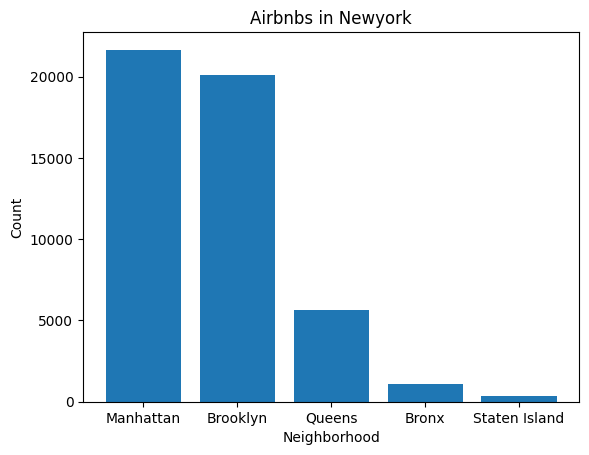

In [5]:
#question: are corresponding values correct?
#barchart
values = df['neighbourhood_group'].value_counts().tolist()
print(values)
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Airbnbs in Newyork')
plt.show()


In [6]:
#Expensive and cheap neighborhoods

#finds most expensive property in the neighbourhood
def max_price(enter_city, df):
  city = str(enter_city)
  maxm_price = df.loc[df['neighbourhood_group']== city, 'price'].max()
  return maxm_price

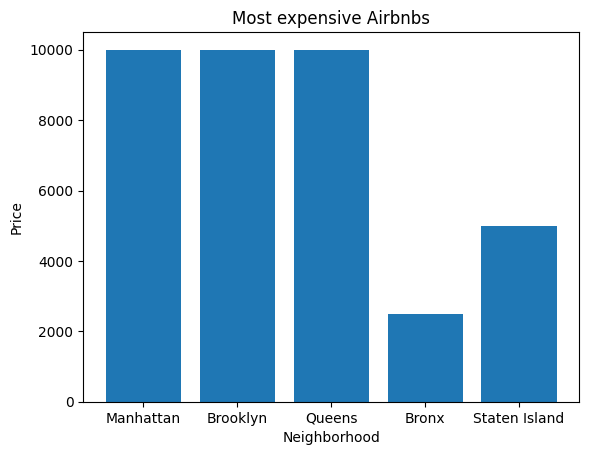

In [7]:
#Bar chart for expensive properties
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']
values = [ max_price('Manhattan',df), max_price('Brooklyn',df), max_price('Queens' ,df),
          max_price('Bronx',df), max_price('Staten Island',df)]

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Most expensive Airbnbs')
plt.show()

In [8]:
#finds cheapest properties
def min_price(enter_city, df):
  city = str(enter_city)
  minm_price = df.loc[df['neighbourhood_group']== city, 'price'].min()
  return minm_price

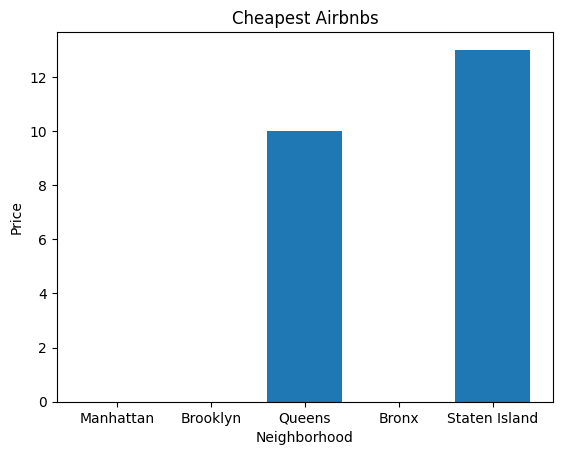

In [9]:
#Bar chart for cheapest properties
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']
values = [ min_price('Manhattan',df), min_price('Brooklyn',df), min_price('Queens' ,df),
          min_price('Bronx',df), min_price('Staten Island',df)]

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Cheapest Airbnbs')
plt.show()

#chart indicates 'Zero' values in Manhattan and Brooklyn

In [10]:
#checking price == 0
free_airbnbs = df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)].shape[0]
print(free_airbnbs)

free_airbnbs2 = df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)].shape[0]
print(free_airbnbs2)

#need to drop 10 rows, where price == 0
drop_me1 = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)].index
drop_me2 = df[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)].index
drop_me3 = df[(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)].index

#drop and override
df = df.drop(drop_me1)
df = df.drop(drop_me2)
df = df.drop(drop_me3)

df.shape

9
1


(48884, 16)

**Exploratory Data Analysis**

Task 2:

4) Which Host has Highest count of properties

5) Which neighbourhood is most expensive and cheapest top 10 barchart

6) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

In [11]:
df['host_name'].value_counts()
#Michael has the most properties

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11450, dtype: int64

In [13]:
#most expensive neighborhoods
exp = df.loc[df.groupby('neighbourhood')['price'].idxmax()].sort_values('price', ascending=False)
exp_top10 = df.iloc[:10, [5, 9]]
exp_top10

,neighbourhood,price
0,Kensington,149
1,Midtown,225
2,Harlem,150
3,Clinton Hill,89
4,East Harlem,80
5,Murray Hill,200
6,Bedford-Stuyvesant,60
7,Hell's Kitchen,79
8,Upper West Side,79
9,Chinatown,150


['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown']
[149, 225, 150, 89, 80, 200, 60, 79, 79, 150]


<function matplotlib.pyplot.show(close=None, block=None)>

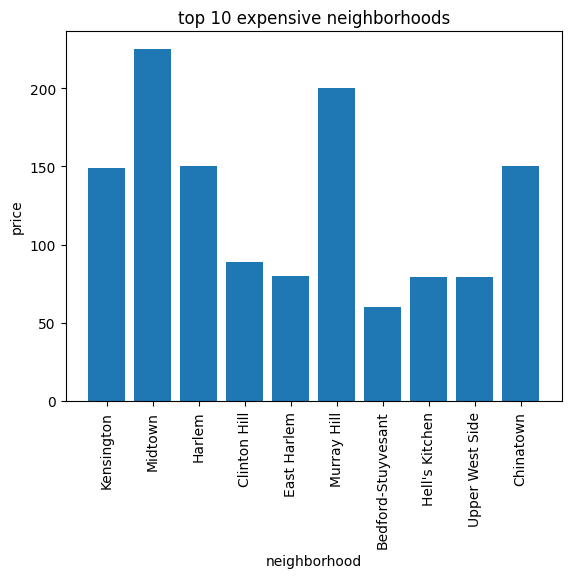

In [14]:
#bar chart: top 10 expensive

categories = exp_top10['neighbourhood'].tolist()
print(categories)

values = exp_top10['price'].tolist()
print(values)


plt.bar(categories, values)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.title('top 10 expensive neighborhoods')
plt.xticks(rotation='vertical')
plt.show

In [15]:
#cheapest properties (location)
chp = df.loc[df.groupby('neighbourhood')['price'].idxmin()].sort_values('price', ascending=True)
chp_top10 = chp.iloc[:10,[5,9]]
chp_top10

,neighbourhood,price
21700,Harlem,10
27972,Greenpoint,10
23256,Upper East Side,10
31066,Upper West Side,10
22287,SoHo,10
35601,Bedford-Stuyvesant,10
22261,Bushwick,10
24100,Hell's Kitchen,10
2860,East Village,10
32810,Sunset Park,10


<function matplotlib.pyplot.show(close=None, block=None)>

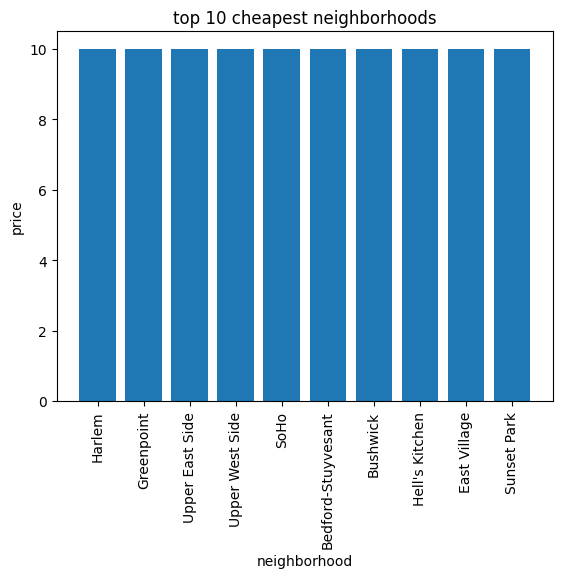

In [16]:
#top 10 cheapest neighborhoods
categories = chp_top10['neighbourhood'].tolist()
values = chp_top10['price'].tolist()

plt.bar(categories, values)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.title('top 10 cheapest neighborhoods')
plt.xticks(rotation='vertical')
plt.show

**Exploratory Data Analysis**

Task 3:

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8) scatter plot between longitutude and latitude for different neighbourhood groups

9) scatter plot between longitutude and latitude for different room_types

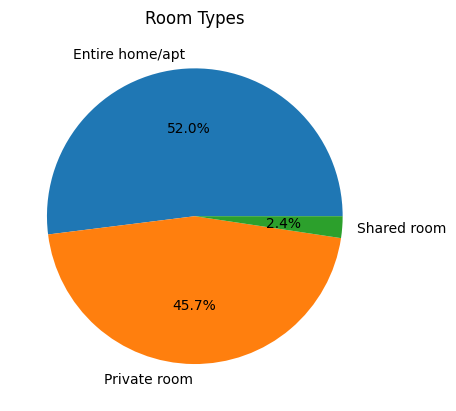

In [17]:
#pie chart of room types
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Room Types')
plt.show()

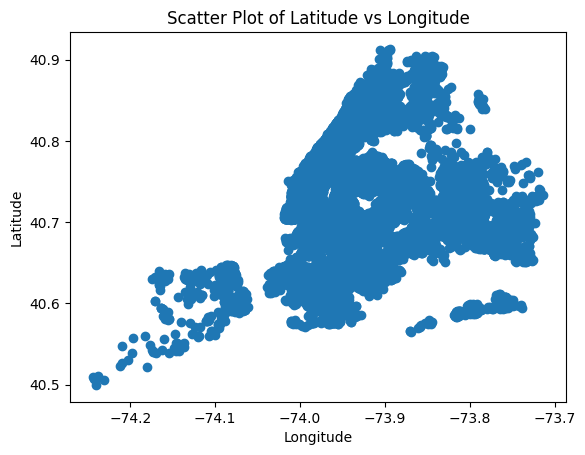

In [18]:
#scatter-plot
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()

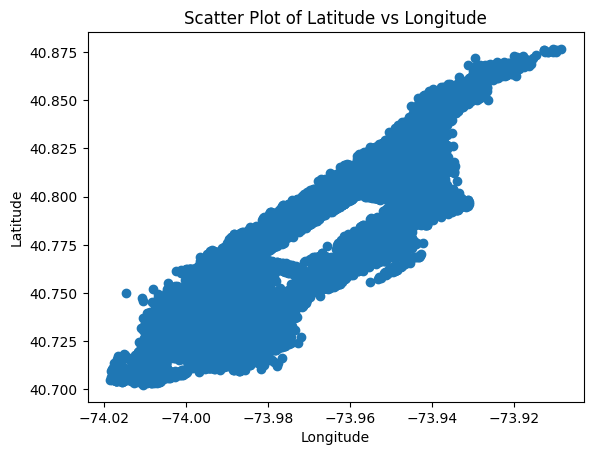

In [19]:
#scatterplot for manhattan
df_man = df.loc[df['neighbourhood_group']== 'Manhattan']
df_man

plt.scatter(df_man['longitude'], df_man['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()

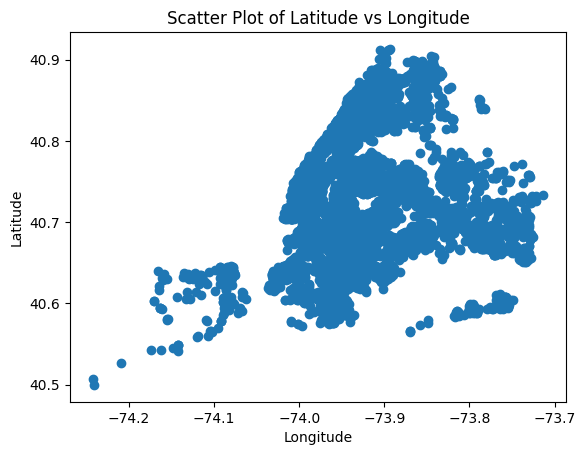

In [20]:
#scatter plot for Private room
df_pr = df.loc[df['room_type']== 'Private room']
df_pr

plt.scatter(df_pr['longitude'], df_pr['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()


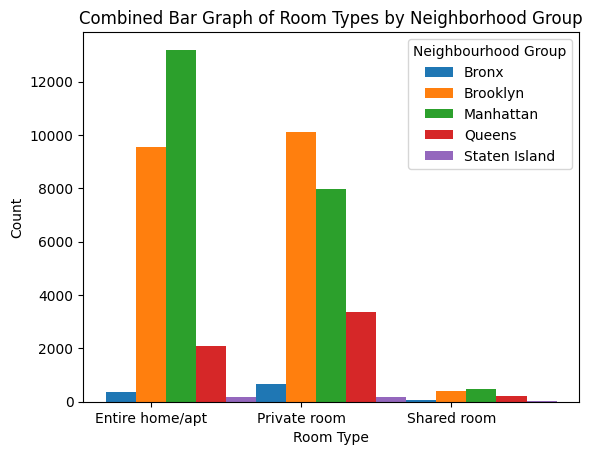

In [21]:
# Group the data by 'room_type' and 'neighbourhood_group' and count the occurrences
grouped_data = df.groupby(['room_type', 'neighbourhood_group']).size().unstack()

# Extract the room types
room_types = grouped_data.index

# Set the bar width
bar_width = 0.2

# Calculate the positions for the bars
bar_positions = range(len(room_types))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'neighbourhood_group' within each room type
for i, neighbourhood_group in enumerate(grouped_data.columns):
    ax.bar([x + i * bar_width for x in bar_positions], grouped_data[neighbourhood_group], width=bar_width,
           label=neighbourhood_group)

# Set the x-axis labels and tick positions
ax.set_xticks([x + bar_width for x in bar_positions])
ax.set_xticklabels(room_types)

# Set the labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Combined Bar Graph of Room Types by Neighborhood Group')

# Create the legend
plt.legend(title='Neighbourhood Group')

# Display the chart
plt.show()

In [22]:
#Modeling
df = pd.read_csv('/content/drive/MyDrive/AirBNB data/AB_NYC_2019.csv')

In [23]:
#need to drop 10 rows, where price == 0
drop_me1 = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)].index
drop_me2 = df[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)].index
drop_me3 = df[(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)].index

#drop and override
df = df.drop(drop_me1)
df = df.drop(drop_me2)
df = df.drop(drop_me3)

df.shape

(48884, 16)

In [24]:
#missing values in categorical variables
missing_values = df.isna().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [25]:
df.drop(['name', 'id', 'host_name', 'host_id','last_review' ], axis =1, inplace = True)

In [26]:
# Calculate the mean of the 'reviews_per_month' column
mean_reviews_per_month = df['reviews_per_month'].mean()

# Replace NaN values with the mean
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

In [27]:
df.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373128,1,365


In [28]:
#Dependent , independent
y = df.iloc[:, 5:6]

X= df.iloc[:, :5].join(df.iloc[:, 6:]) #except i=5 column
print(type(X))

<class 'pandas.core.frame.DataFrame'>


Categorical encoding

#label encoding
room type (i=4). Why? order matters!

neighborhood (i=1). Why? too many categories, so,don't use dummies.

#onehot ecnoding
neighbourhood_group (i=0). Why? order doesn't matter & few categories

In [29]:
#categorical encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Specify the column indices to encode
column_indices = [ 0,1, 4]

#use label encoder and override
X.iloc[:, column_indices]= X.iloc[:, column_indices].apply(encoder.fit_transform) #direct override, no need to concatenate

print(X)

       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                        1            108  40.64749  -73.97237          1   
1                        2            127  40.75362  -73.98377          0   
2                        2             94  40.80902  -73.94190          1   
3                        1             41  40.68514  -73.95976          0   
4                        2             61  40.79851  -73.94399          0   
...                    ...            ...       ...        ...        ...   
48890                    1             13  40.67853  -73.94995          1   
48891                    1             28  40.70184  -73.93317          1   
48892                    2             94  40.81475  -73.94867          0   
48893                    2             95  40.75751  -73.99112          2   
48894                    2             95  40.76404  -73.98933          1   

       minimum_nights  number_of_reviews  reviews_per_month  \
0           

<ipython-input-29-250662d2c9df>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, column_indices]= X.iloc[:, column_indices].apply(encoder.fit_transform) #direct override, no need to concatenate


In [30]:
X.shape
y.values.ravel().shape

(48884,)

In [31]:
#train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=10)

rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

<ipython-input-35-513389d739a5>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train_scaled, y_train)


Accuracy: 0.07517643448910709


In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of logistic:", accuracy_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic: 0.07323309808734786


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
